In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


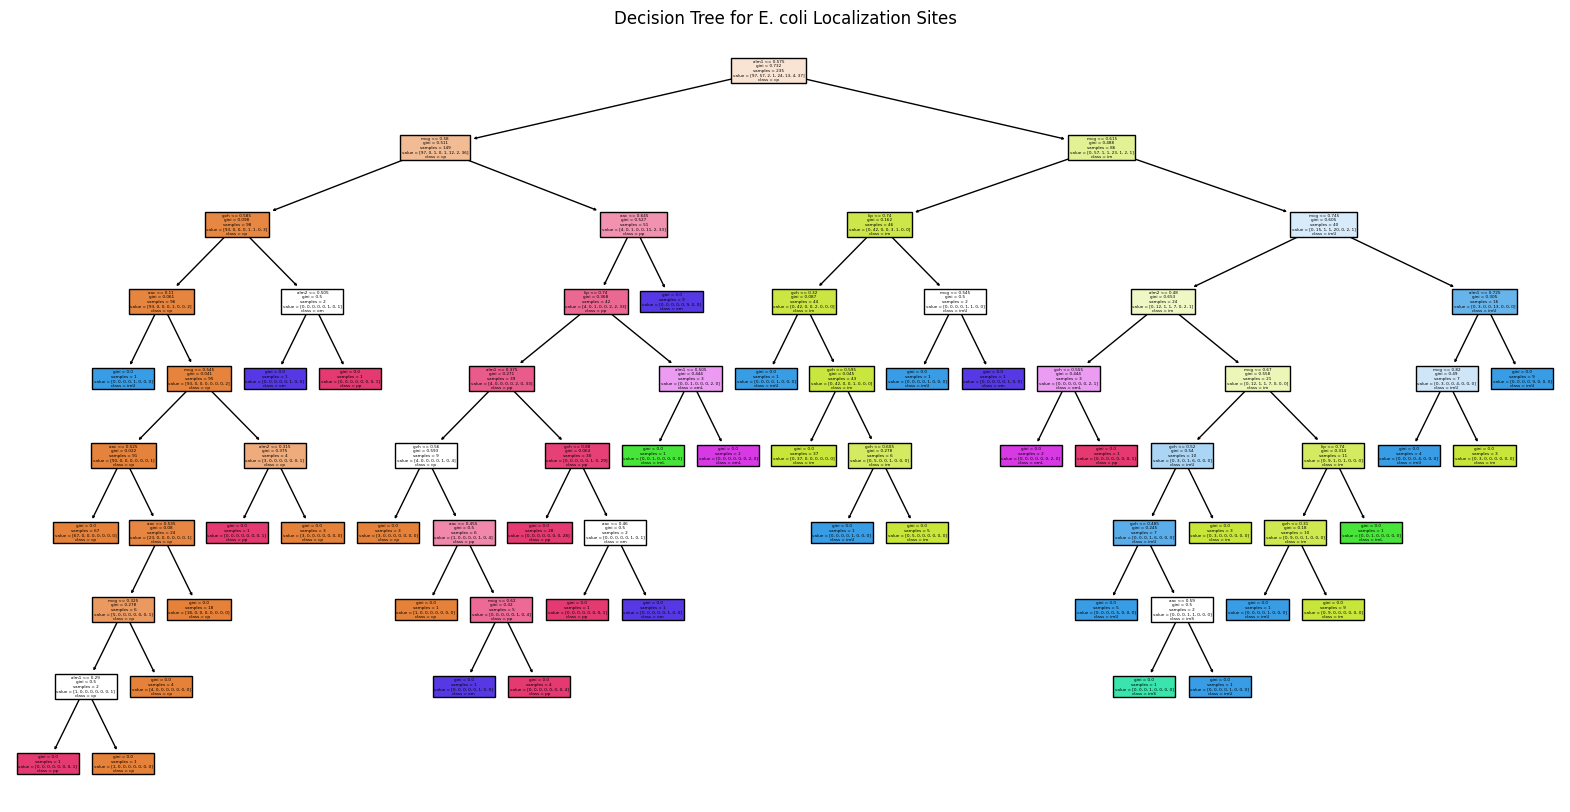

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt

# Load the data files
data_file = '/content/drive/MyDrive/DatasetforDA/ecoli/ecoli.data'
names_file = '/content/drive/MyDrive/DatasetforDA/ecoli/ecoli.names'

# Read the names file to understand the structure of the dataset
with open(names_file, 'r') as file:
    names_content = file.readlines()

# Defining column names based on the 'names' file content
columns = [
    "Sequence Name", "mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2", "Class"
]

# Load the dataset with the defined column names
ecoli_data = pd.read_csv(data_file, sep='\s+', header=None, names=columns)

# Prepare the data for training
X = ecoli_data.drop(columns=["Sequence Name", "Class"])
y = ecoli_data["Class"]

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=label_encoder.classes_, filled=True)
plt.title("Decision Tree for E. coli Localization Sites")
plt.show()
